In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib notebook 
from sklearn import datasets
import sklearn
import matplotlib as mpl

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [23]:
tree_clf = DecisionTreeClassifier(max_depth=2)

In [24]:
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Visualizing Trees

In [17]:
from sklearn.tree import export_graphviz

In [21]:
export_graphviz(
 tree_clf,
 out_file="iris_tree.dot",
 feature_names=iris.feature_names[2:],
 class_names=iris.target_names,
 rounded=True,
 filled=True
 )

One of the many qualities of Decision Trees is that they require
very little data preparation. In particular, they don’t require feature
scaling or centering at all.

A node’s 'samples' attribute counts how many training instances it applies to. For
example, 100 training instances have a petal length greater than 2.45 cm (depth 1,
right), among which 54 have a petal width smaller than 1.75 cm (depth 2, left). A
node’s value attribute tells you how many training instances of each class this node
applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 IrisVersicolor, and 45 Iris-Virginica. Finally, a node’s gini attribute measures its impur‐
ity: a node is “pure” (gini=0) if all training instances it applies to belong to the same
class. For example, since the depth-1 left node applies only to Iris-Setosa training
instances, it is pure and its gini score is 0. Equation 6-1 shows how the training algo‐
rithm computes the gini score Gi
 of the ith node. For example, the depth-2 left node
has a gini score equal to 1 – (0/54)2
 – (49/54)2
 – (5/54)2 ≈ 0.168. Another impurity
measure is discussed shortly

Scikit-Learn uses the CART algorithm, which produces only binary
trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers). However, other algorithms such as ID3 can
produce Decision Trees with nodes that have more than two chil‐
dren.

<IPython.core.display.Javascript object>


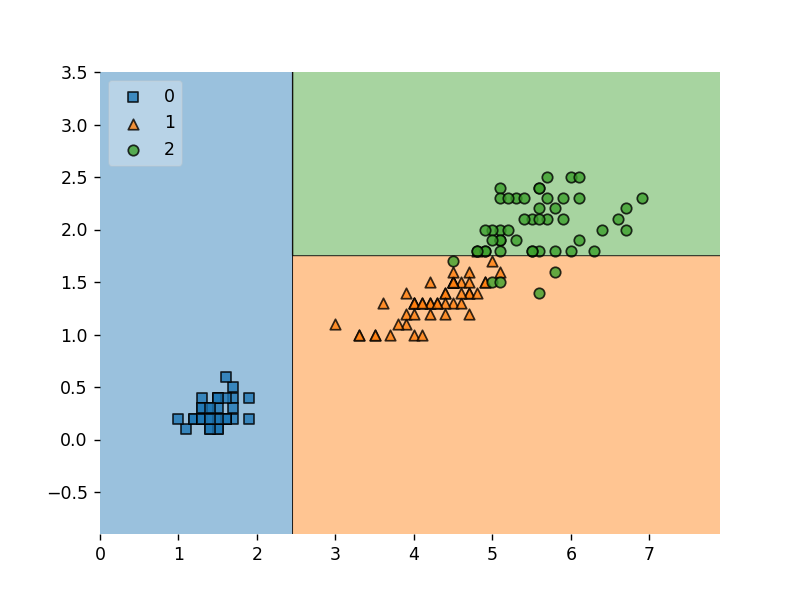

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X, 
                      y=y.astype(np.integer),
                      clf=tree_clf, 
                      legend=2)

As you can see Decision Trees are fairly intuitive and their decisions are easy to inter‐
pret. Such models are often called white box models. In contrast, as we will see, Ran‐
dom Forests or neural networks are generally considered black box models. They
make great predictions, and you can easily check the calculations that they performed
to make these predictions; nevertheless, it is usually hard to explain in simple terms
why the predictions were made. For example, if a neural network says that a particu‐
lar person appears on a picture, it is hard to know what actually contributed to this
prediction: did the model recognize that person’s eyes? Her mouth? Her nose? Her
shoes? Or even the couch that she was sitting on? Conversely, Decision Trees provide
nice and simple classification rules that can even be applied manually if need be (e.g.,
for flower classification)

In [39]:
tree_clf.predict_proba([[5, 1.5]])  # Plot in the graph

array([[0.        , 0.90740741, 0.09259259]])

In [42]:
tree_clf.predict([[5,1.5]])  # class 1

array([1])

## Unregularized model

The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the
max_depth hyperparameter (the default value is None, which means unlimited).
Reducing max_depth will regularize the model and thus reduce the risk of overfitting.

<IPython.core.display.Javascript object>


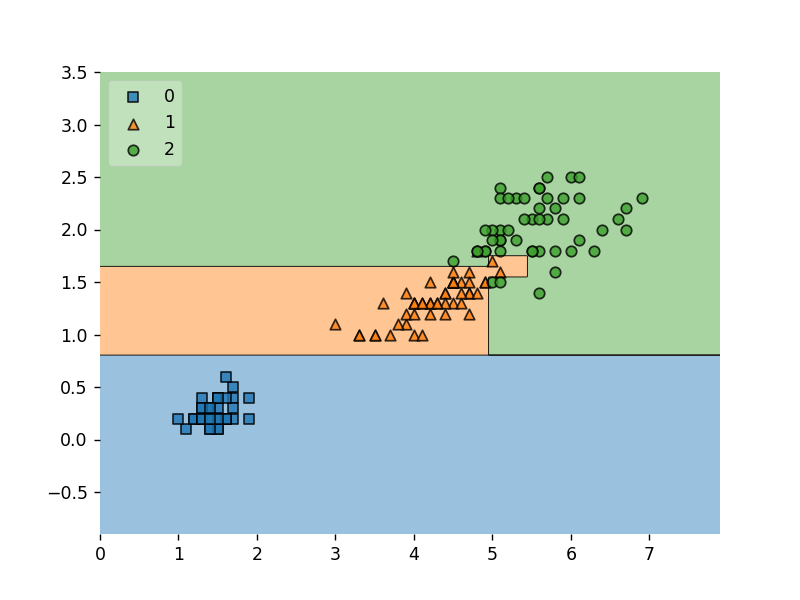

In [22]:
from mlxtend.plotting import plot_decision_regions   # Max depth is not set (Default is unlimited). Overfitting model
plot_decision_regions(X=X, 
                      y=y.astype(np.integer),
                      clf=tree_clf, 
                      legend=2)

The DecisionTreeClassifier class has a few other parameters that similarly restrict
the shape of the Decision Tree: min_samples_split (the minimum number of sam‐
ples a node must have before it can be split), min_samples_leaf (the minimum num‐
ber of samples a leaf node must have), min_weight_fraction_leaf (same as
min_samples_leaf but expressed as a fraction of the total number of weighted
instances), max_leaf_nodes (maximum number of leaf nodes), and max_features
(maximum number of features that are evaluated for splitting at each node). Increas‐
ing min_* hyperparameters or reducing max_* hyperparameters will regularize the
model.

In [27]:
from sklearn.datasets import make_moons

In [28]:
X,y = make_moons(n_samples=100,random_state=42,noise=0.15)

<IPython.core.display.Javascript object>


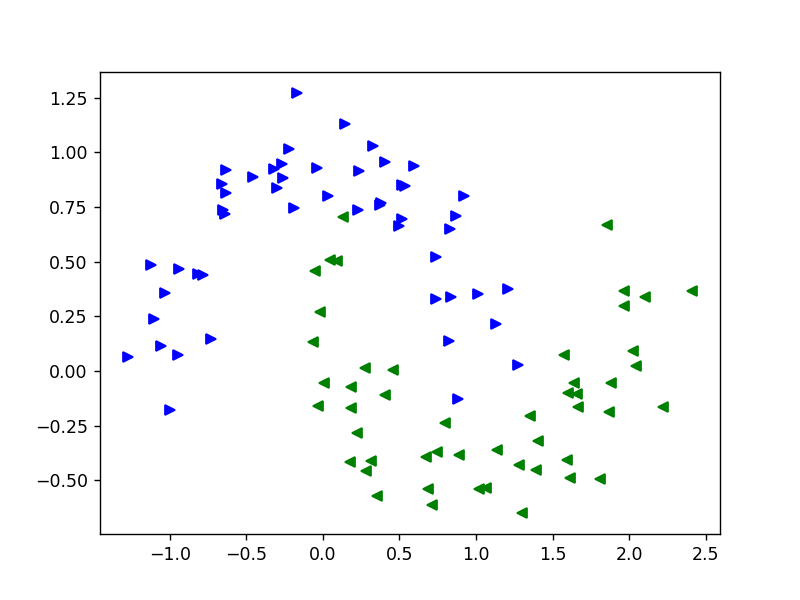

In [33]:
plt.plot(X[:,0][y==0], X[:,1][y==0], 'b>')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'g<')

In [37]:
unregularized_tree_clf = DecisionTreeClassifier()

In [38]:
unregularized_tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<IPython.core.display.Javascript object>


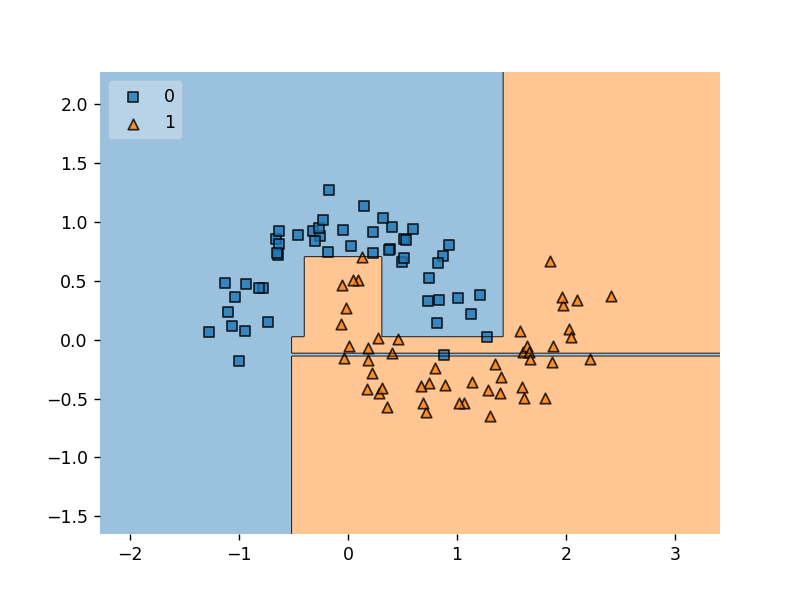

In [40]:
plot_decision_regions(X=X, 
                      y=y.astype(np.integer),
                      clf=unregularized_tree_clf, 
                      legend=2)

In [79]:
regularized_tree_clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=4)

In [80]:
regularized_tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Increasing min_* and decreasing max_* regularizes the model.

<IPython.core.display.Javascript object>


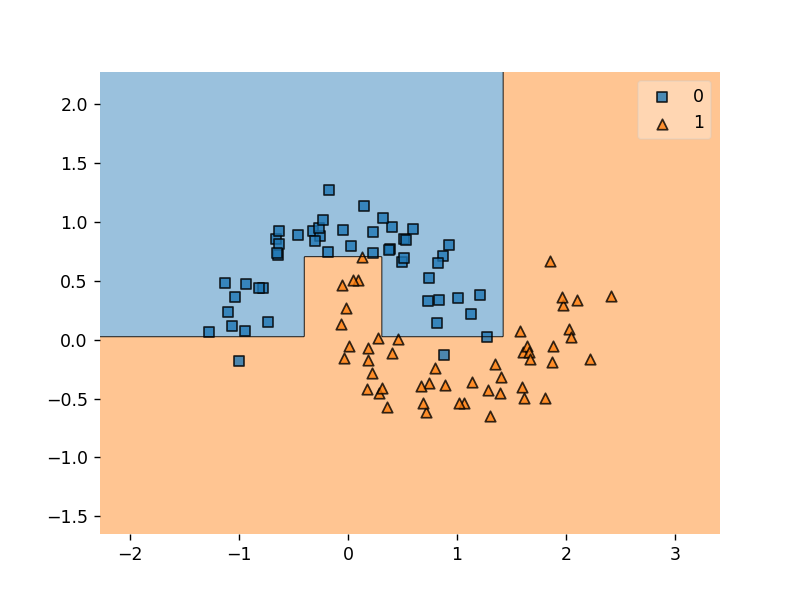

In [82]:
plot_decision_regions(X=X,y=y,clf=regularized_tree_clf)  

In [84]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

<IPython.core.display.Javascript object>


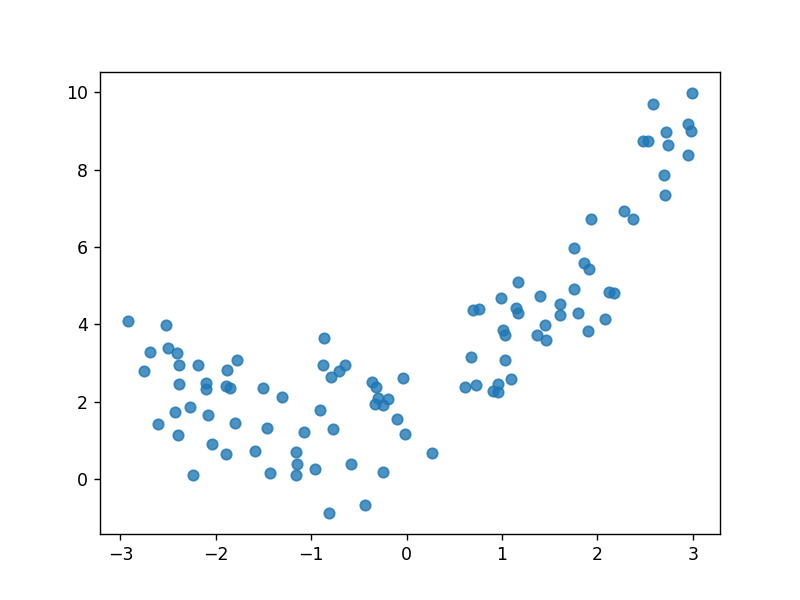

In [87]:
plt.plot(X,y,'o',alpha=0.8)

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
tree_reg = DecisionTreeRegressor(max_depth=2)

In [136]:
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [137]:
x1 = np.linspace(-3,3,500)

In [138]:
y_pred = tree_reg.predict(x1.reshape(-1,1))

<IPython.core.display.Javascript object>


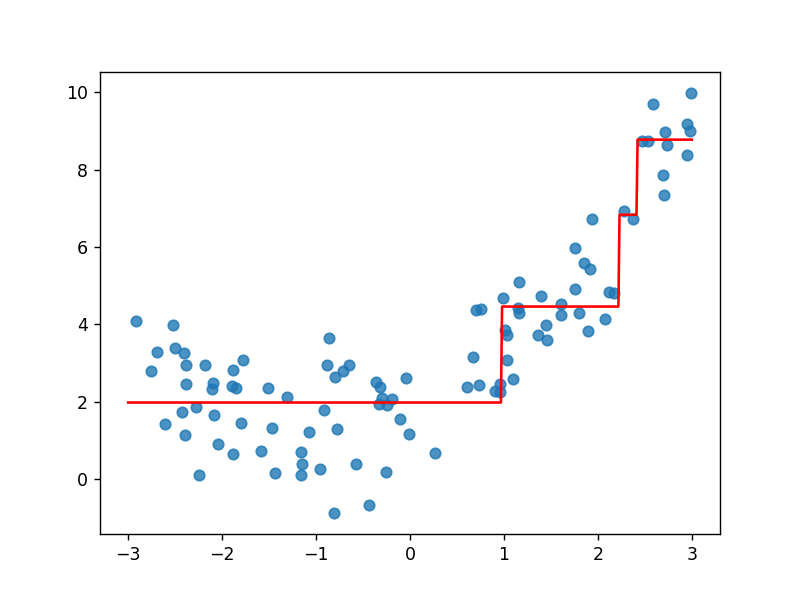

In [139]:
plt.plot(X,y,'o',alpha=0.8)  # Regularized model with max_depth = 2
plt.plot(x1,y_pred,'r')

<IPython.core.display.Javascript object>


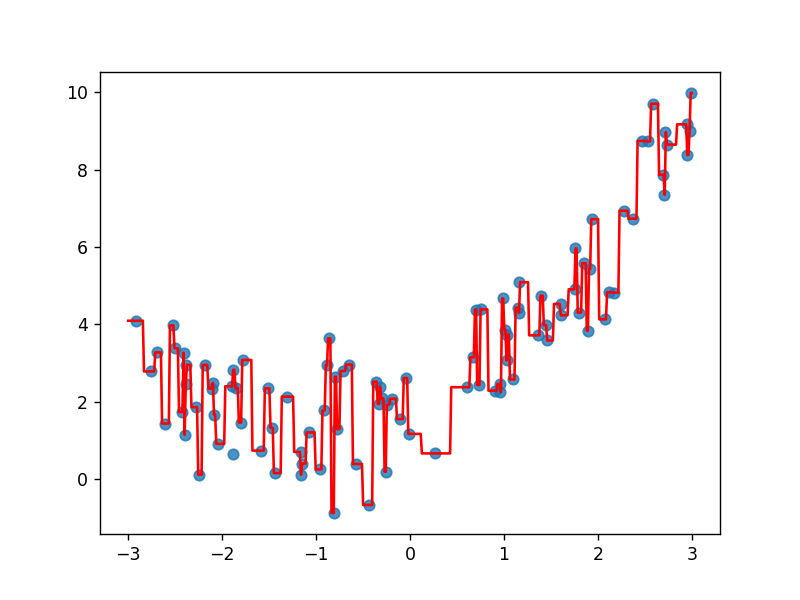

In [134]:
plt.plot(X,y,'o',alpha=0.8)   # Unregularized overfitting model with unlimited max_depth.
plt.plot(x1,y_pred,'r')